Write a code for minimum edit distance
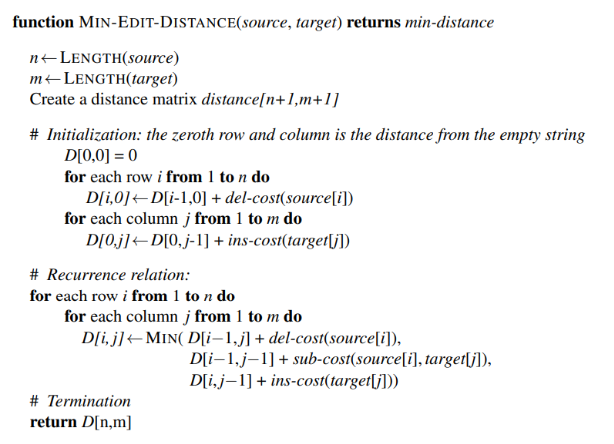

In [ ]:
# Implement the above pseudocode

In [32]:
!pip install nltk

In [33]:
import nltk
from nltk import CFG, ChartParser

In [34]:
grammar = CFG.fromstring("""
    S -> NP VP | NP VP "."
    NP -> Det N | N
    VP -> V NP | V
    Det -> 'the' | 'a'
    N -> 'cat' | 'dog' | 'book'
    V -> 'chased' | 'read' | 'played'
""")

In [35]:
parser = ChartParser(grammar)
def parse_sentence(sentence):
    tokens = nltk.word_tokenize(sentence)

    print(f"Parsing sentence: {sentence}")
    for tree in parser.parse(tokens):
        tree.pretty_print()
        print()

In [36]:
parse_sentence("the cat chased the dog.")
parse_sentence("a dog played")
parse_sentence("the book read a cat")

Parsing sentence: the cat chased the dog.
             S                    
  ___________|__________           
 |       |              VP        
 |       |         _____|___       
 |       NP       |         NP    
 |    ___|___     |      ___|___   
 |  Det      N    V    Det      N 
 |   |       |    |     |       |  
 .  the     cat chased the     dog


Parsing sentence: a dog played
         S        
      ___|____     
     NP       VP  
  ___|___     |    
Det      N    V   
 |       |    |    
 a      dog played


Parsing sentence: the book read a cat
              S              
      ________|____           
     |             VP        
     |         ____|___       
     NP       |        NP    
  ___|___     |     ___|___   
Det      N    V   Det      N 
 |       |    |    |       |  
the     book read  a      cat




Task 1:


In [12]:
import nltk
from nltk import PCFG, ViterbiParser

# Define a probabilistic CFG (PCFG)
pcfg_grammar = PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> Det N [0.6] | Det N PP [0.4]
    VP -> V NP [0.7] | V NP PP [0.3]
    PP -> P NP [1.0]
    Det -> 'the' [0.8] | 'a' [0.2]
    N -> 'dog' [0.4] | 'cat' [0.4] | 'stick' [0.2]
    V -> 'chased' [0.9] | 'saw' [0.1]
    P -> 'with' [1.0]
""")

# Create a Viterbi parser for the PCFG
parser = ViterbiParser(pcfg_grammar)

# Ambiguous sentence
ambiguous_sentence = "the cat chased the dog with a stick"

# Tokenize the sentence
tokens = ambiguous_sentence.split()

# Parse the sentence and print the most likely parse tree
print("Parsing ambiguous sentence:")
for tree in parser.parse(tokens):
    tree.pretty_print()

Parsing ambiguous sentence:
                    S                        
      ______________|___                      
     |                  VP                   
     |         _________|___                  
     |        |             NP               
     |        |      _______|____             
     |        |     |   |        PP          
     |        |     |   |    ____|___         
     NP       |     |   |   |        NP      
  ___|___     |     |   |   |     ___|____    
Det      N    V    Det  N   P   Det       N  
 |       |    |     |   |   |    |        |   
the     cat chased the dog with  a      stick



# Task
1. Implement the grammar given in image
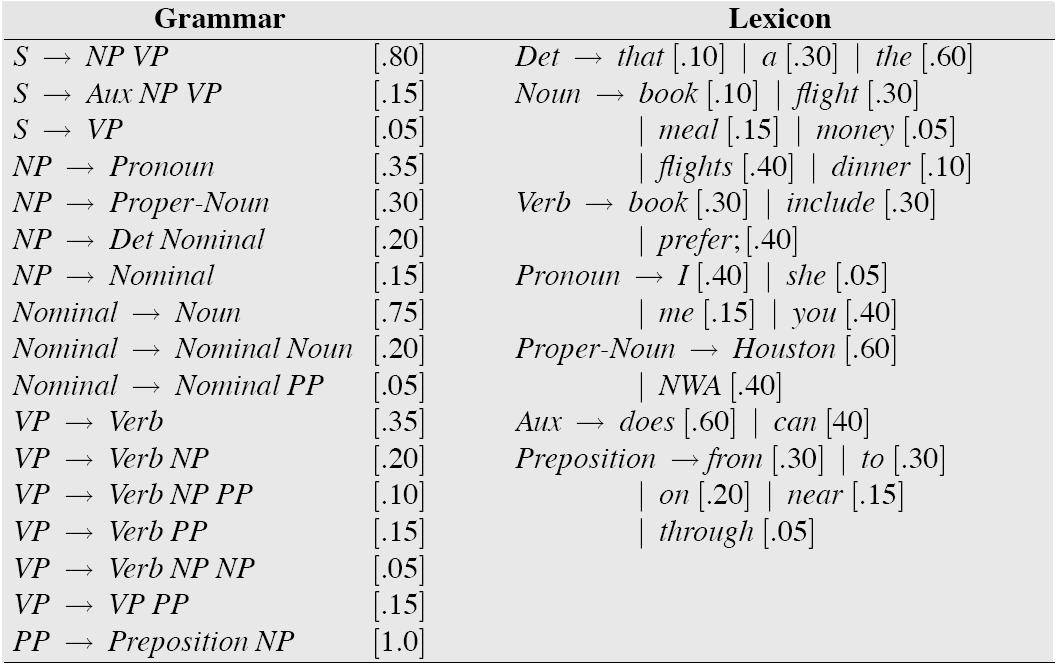
2. Consider the Assembly code written where only 3 instructions are possible that is MOV, ADD and SUB. Write a CFG for that and generate a parser tree.
    
    MOV R1, 10

    ADD R1, 5
    
    SUB R2, 20
3. Make a grammar checker program which only allows sentences which are mapped according to the production rules. If a sentence exist which doesn't lies in production rules it should raise an error.

2. Read this paper and write a brief summary http://web.mit.edu/6.441/spring06/projects/1/aak@mit.edu.1.pdf

3. Implement the pseudocode mentioned in the paper "Compiler Design Using Context-Free Grammar" https://www.irjet.net/archives/V10/i1/IRJET-V10I165.pdf

